# Lecture

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import tensorflow as tf
import numpy as np

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# XGBoost
#! pip install graphviz
#! pip install xgboost
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

XGBoost version: 2.0.3


In [9]:
np.random.seed(12345)

# dname="/content/drive/MyDrive/LCP_projects/LCP - B/Ex3/DATA/"  <--  only for Drive
%cd DATA
str0="_XGB_24.dat"
fnamex='x'+str0
fnamey='y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

[Errno 2] No such file or directory: 'DATA'
/Users/darioliotta/Documents/Physics of Data/Laboratory of Computational Physics/Modulus B/Exercises/Ex3/DATA
N=4000, N_train=3000, L=4


[-31.608 -29.544   6.773   9.554] 0
[46.451 15.318 24.891 15.357] 1
[ 24.771  46.131 -49.161 -39.356] 1
[-20.13   15.641  30.981  37.218] 1
[46.465 22.369 14.248 21.745] 1


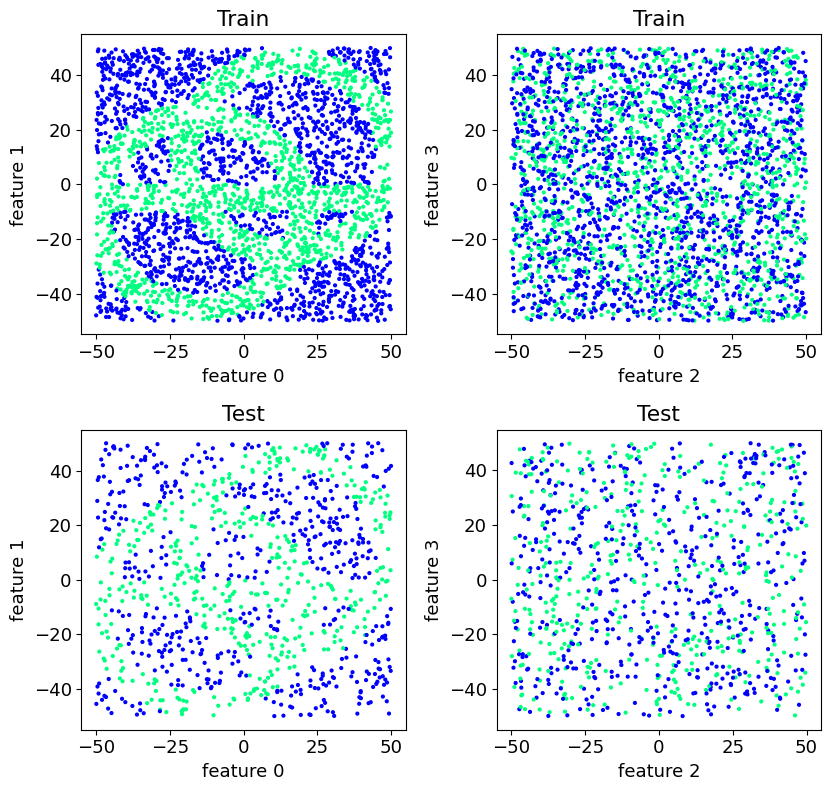

In [10]:
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

for n in range(5):
    print(x[n],y[n])

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

In [13]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default?)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)

    print("errors: {:.2f}%   Accuracy={:.3f}".format(100*(1-clf.score(x_test, y_test)),clf.score(x_test, y_test)))
    S=50
    dx = 1
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,L))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:2] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    fig,AX = plt.subplots(1,2,figsize=(8.2,4))
    scat(AX[0],x_plot[:],y_plot,s=dx,title="predicted")
    scat(AX[1],x_train[:],y_train,title="training set")
    fig.tight_layout()
    plt.show()

    if show:
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)

        fig, AX = plt.subplots(2,1,figsize=(12, 5))
        for i in range(min(2,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        # fig.savefig("/content/drive/MyDrive/LCP_projects/LCP - B/Ex3/DATA/tree-classif.png", dpi=400, pad_inches=0.02)  <--  only for Drive
        fig.savefig("tree-classif.png", dpi=400, pad_inches=0.02)
        plt.show()

### Classify
If the “objective” hyperparameter is left unspecified, XGBClassifier looks at the data and chooses automatically the loss functions and the evaluation metrics (--> WARNING)

## XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html

errors: 5.20%   Accuracy=0.948


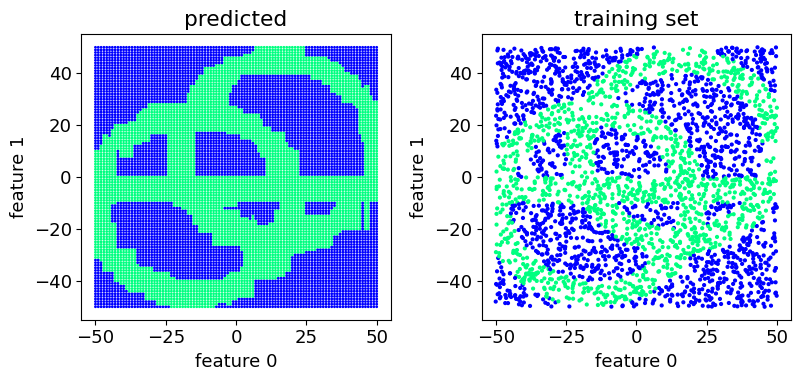

num_trees= 100


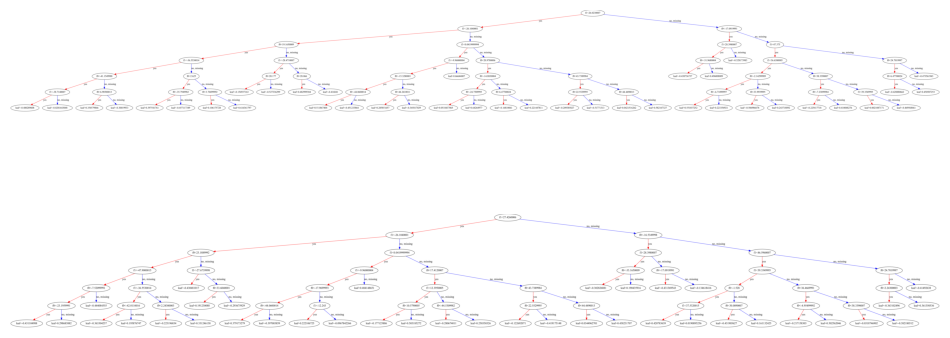

In [14]:
model = XGBClassifier(seed=1, objective='binary:logistic')
       # importance_type="gain" #weight, cover, ...
       # learning_rate=0.4,
       # reg_lambda=0.001,
       # n_estimators=30)

classify(model, show=True)

None
[0.4891835  0.37623835 0.06590363 0.06867457]


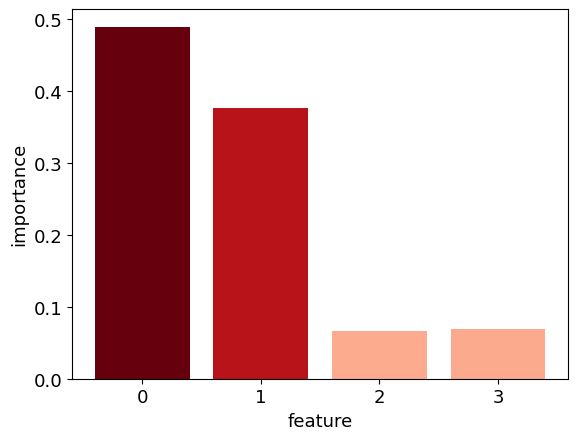

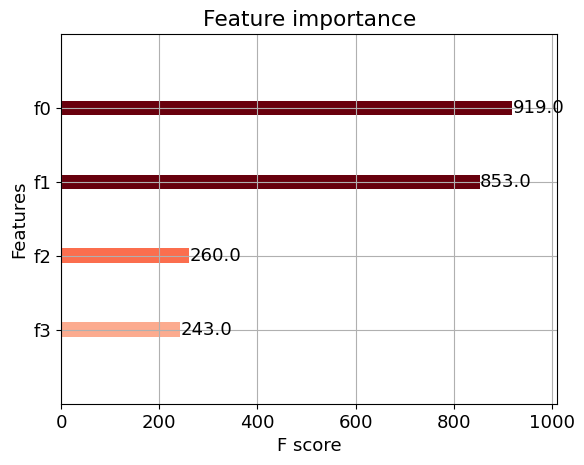

In [15]:
# https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# feature importance

print(model.importance_type)
print(model.feature_importances_)
# plot
my_cmap = plt.get_cmap("Reds")
rescale = lambda y: 0.3 + 0.7 * (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_,
        color=my_cmap(rescale(model.feature_importances_)))
plt.xlabel("feature")
plt.ylabel("importance")
plt.xticks(np.arange(L))
plt.title(model.importance_type)
plt.show()

rescale_r = lambda y: 0.3 + 0.7 * (np.max(y) - y) / (np.max(y) - np.min(y))
plot_importance(model,color=my_cmap(rescale_r(model.feature_importances_)))
plt.show()

Documentation: https://xgboost.readthedocs.io/en/stable/python/python_api.html

    ‘weight’: the number of times a feature is used to split the data across all trees.

    ‘gain’: the average gain across all splits the feature is used in.

    ‘cover’: the average coverage across all splits the feature is used in.

    ‘total_gain’: the total gain across all splits the feature is used in.

    ‘total_cover’: the total coverage across all splits the feature is used in.


0 weight [919. 853. 260. 243.]
1 gain [4.56883669 3.5139606  0.61552137 0.64140123]
2 total_gain [4198.76074219 2997.40844727  160.03555298  155.86050415]
3 cover [49.8643837  66.05692291 54.26316071 54.39147949]
4 total_cover [45825.3671875  56346.5546875  14108.421875   13217.12988281]


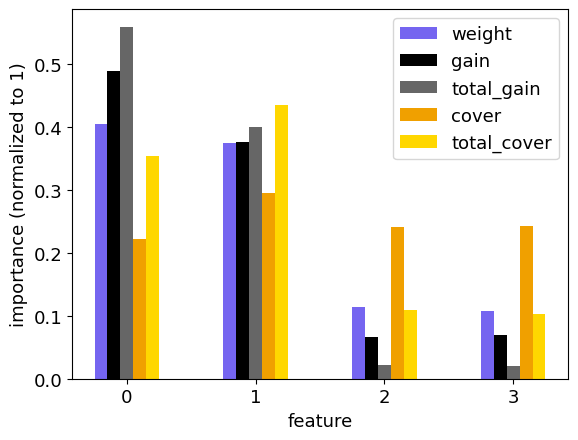

In [16]:
# if the importance type is “total_gain”, then the score is sum of loss change for each split from all trees.
list_type=["weight","gain","total_gain","cover","total_cover"]
list_col=["#7565F0","k","#666666","#F0A000","gold"]

for i,t in enumerate(list_type):
    feature_imp = model.get_booster().get_score(importance_type=t)
    keys = list(feature_imp.keys())
    values = np.array(list(feature_imp.values()))
    print(i,t,values)
    values= values/np.sum(values)
    plt.bar(np.arange(L)+(i-L/2)/10, values,color=list_col[i],width=0.1,label=t)
plt.xlabel("feature")
plt.ylabel("importance (normalized to 1)")
plt.xticks(np.arange(L))
plt.legend()
plt.show()

## normal Gradient Boosting

errors: 19.50%   Accuracy=0.805


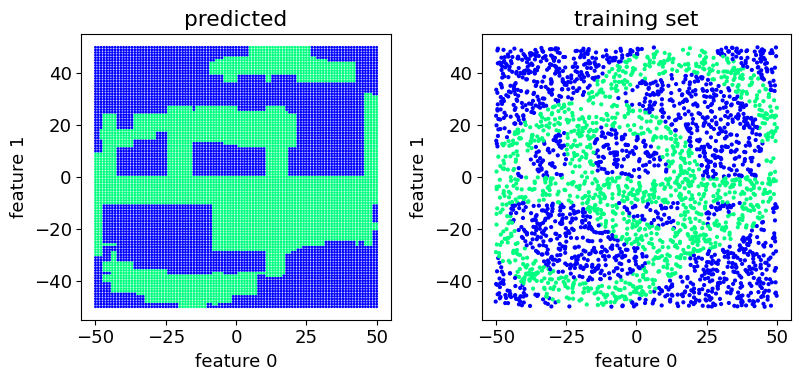

In [17]:
# GradientBoostingClassifier()
classify()

## AdaBoost

errors: 34.10%   Accuracy=0.659


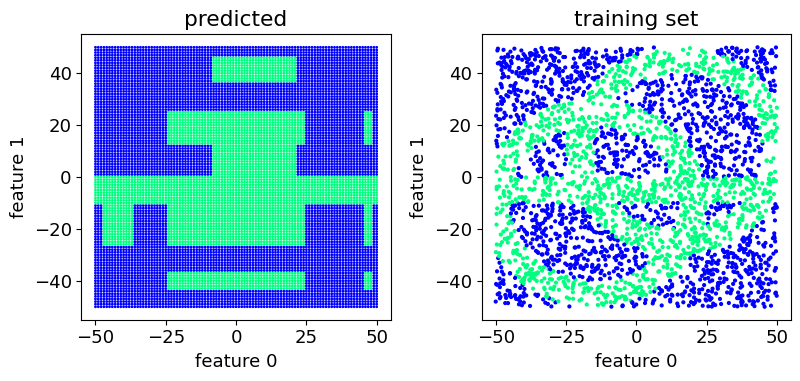

In [18]:
classify(clf=AdaBoostClassifier())

# Exercise

## Section 1 - Model complexity, parameters and regularization

In [35]:
# Assuming x_train and y_train are your training data and labels

def kfold_validation(clf, par = ''):
        kfold = KFold(n_splits=5, shuffle=True)

        # Define per-fold score containers
        scores_train = []
        scores_val = []

        for train, val in kfold.split(x_train, y_train):
            # Fit data to model
            clf.fit(x_train[train], y_train[train])

            # Evaluate the model
            scores = clf.score(x_train[val], y_train[val]) #val
            scores_training = clf.score(x_train[train], y_train[train]) #train

            scores_val.append(scores)
            scores_train.append(scores_training)

        return np.mean(scores_train), np.mean(scores_val)

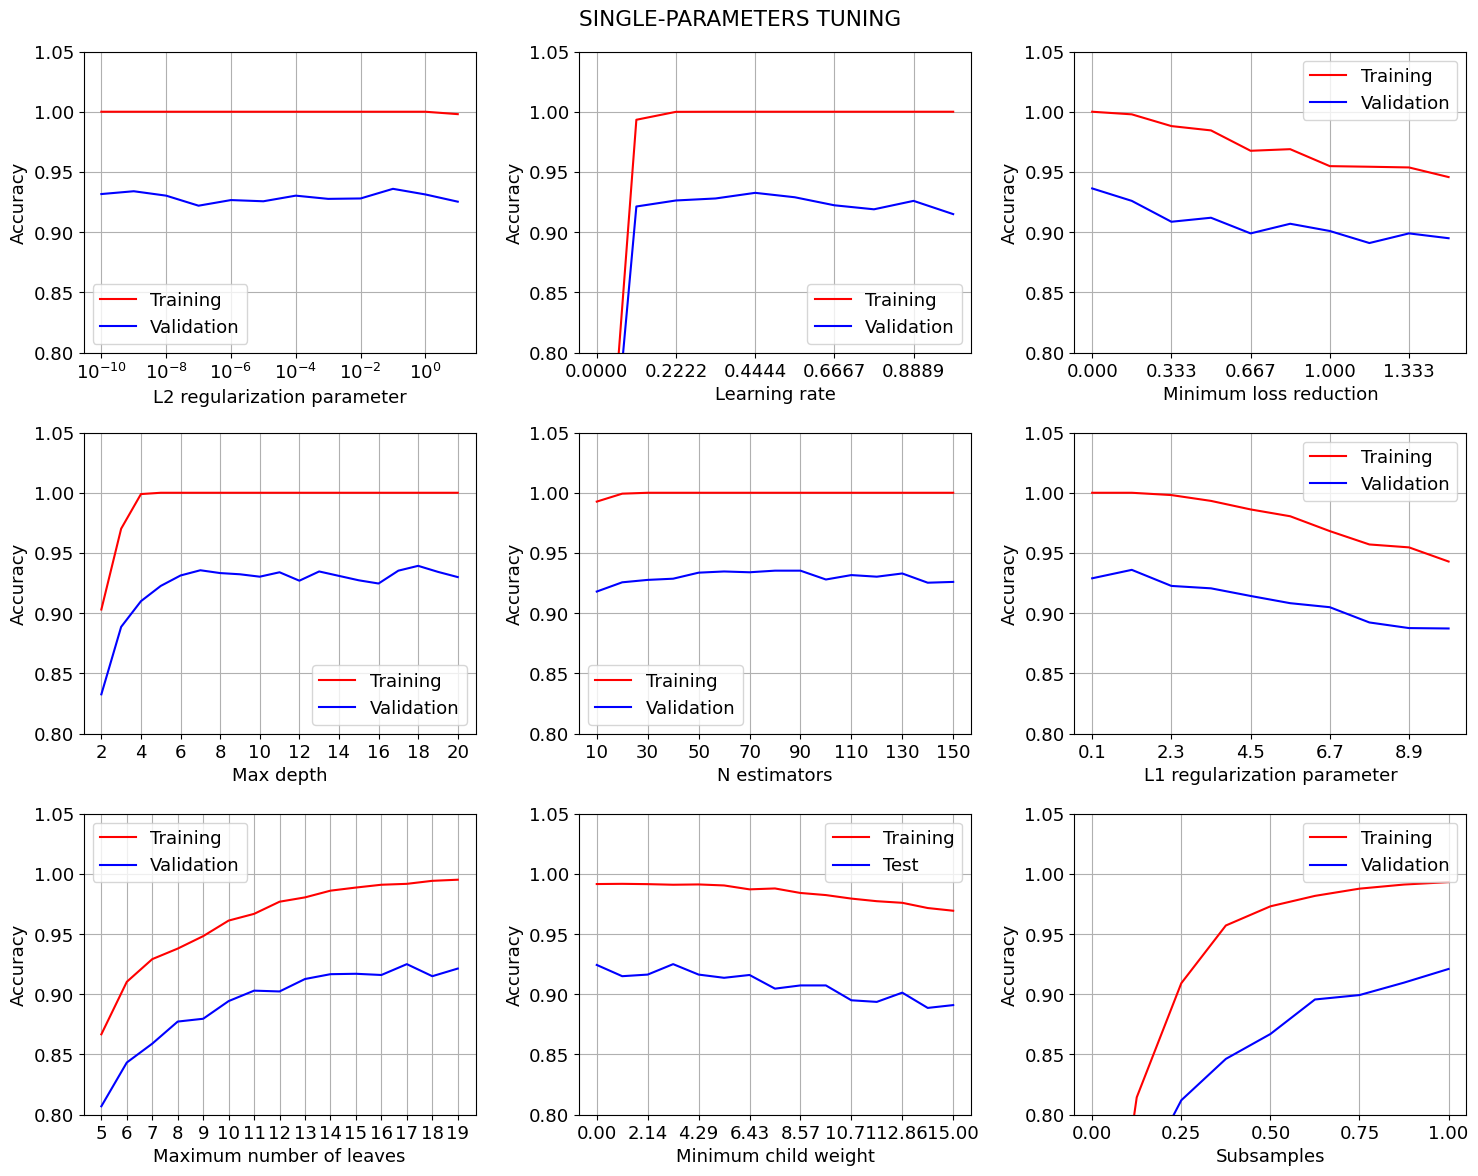

In [36]:
fig = plt.figure(figsize=(15, 12))
fig.suptitle('SINGLE-PARAMETERS TUNING')

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

lambdas = np.logspace(-10, 1, 12)
params = {}
PARAMS = {'reg_lambda': lambdas}
accuracies1 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', reg_lambda=single_lambda), 'lambdas') for single_lambda in lambdas])

ax1.plot(lambdas, accuracies1[:,0], label='Training', color='r')
ax1.plot(lambdas, accuracies1[:,1], label='Validation', color='b')
ax1.set_xlabel('L2 regularization parameter')
ax1.set_ylabel('Accuracy')
ax1.set_xscale('log')
ax1.set_xticks(lambdas[::2])
ax1.legend()
ax1.set_ylim(0.8, 1.05)
ax1.grid(True)


best_lambda = lambdas[np.argmax(accuracies1[:,1])]

etas = np.linspace(0, 1, 10)
params = {}
params['reg_lambda'] = best_lambda
accuracies2 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, learning_rate=eta)) for eta in etas])

ax2.plot(etas, accuracies2[:,0], label='Training', color='r')
ax2.plot(etas, accuracies2[:,1], label='Validation', color='b')
ax2.set_xlabel('Learning rate')
ax2.set_ylabel('Accuracy')
ax2.set_xticks(etas[::2])
ax2.legend()
ax2.set_ylim(0.8, 1.05)
ax2.grid(True)

best_eta = etas[np.argmax(accuracies2[:,1])]

gammas = np.linspace(0, 1.5, 10)
params['eta']=best_eta
PARAMS['eta'] = etas
accuracies3 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, min_split_loss=gamma)) for gamma in gammas])

ax3.plot(gammas, accuracies3[:,0], label='Training', color='r')
ax3.plot(gammas, accuracies3[:,1], label='Validation', color='b')
ax3.set_xlabel('Minimum loss reduction')
ax3.set_ylabel('Accuracy')
ax3.set_xticks(gammas[::2])
ax3.legend()
ax3.set_ylim(0.8, 1.05)
ax3.grid(True)

best_gamma = gammas[np.argmax(accuracies3[:,1])]
max_depths = [int(i) for i in np.arange(2, 21, 1)]
params['gamma']=best_gamma
PARAMS['gamma'] = gammas


accuracies4 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, max_depth=depth)) for depth in max_depths])

ax4.plot(max_depths, accuracies4[:,0], label='Training', color='r')
ax4.plot(max_depths, accuracies4[:,1], label='Validation', color='b')
ax4.set_xlabel('Max depth')
ax4.set_xticks([i for i in 2*np.arange(1,11,1)])
ax4.set_ylabel('Accuracy')
ax4.set_ylim(0.8, 1.05)
ax4.legend()
ax4.grid(True)


#profondità dell'albero

best_depth = 8
ns_estimators = [int(i) for i in np.linspace(10,150,15)]
params['max_depth'] = best_depth

accuracies5 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, n_estimators=n)) for n in ns_estimators])

ax5.plot(ns_estimators, accuracies5[:,0], label='Training', color='r')
ax5.plot(ns_estimators, accuracies5[:,1], label='Validation', color='b')
ax5.set_xlabel('N estimators')
ax5.set_xticks(ns_estimators[::2])
ax5.set_ylabel('Accuracy')
ax5.set_ylim(0.8, 1.05)
ax5.legend()
ax5.grid(True)

params['n_estimators'] = 50

alphas = np.linspace(0.1, 10, 10)
accuracies6 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, reg_alpha = alpha)) for alpha in alphas])

ax6.plot(alphas, accuracies6[:,0], label='Training', color='r')
ax6.plot(alphas, accuracies6[:,1], label='Validation', color='b')
ax6.set_xlabel('L1 regularization parameter')
ax6.set_ylabel('Accuracy')
ax6.set_xticks(alphas[::2])
ax6.legend()
ax6.set_ylim(0.8, 1.05)
ax6.grid(True)

best_alpha = alphas[np.argmax(accuracies6[:,1])]

params['reg_alpha']=best_alpha
PARAMS['reg_alpha'] = alphas

leaves = [int(i) for i in range(5, 20 , 1)]
accuracies7 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, max_leaves = leave)) for leave in leaves])

ax7.plot(leaves, accuracies7[:,0], label='Training', color='r')
ax7.plot(leaves, accuracies7[:,1], label='Validation', color='b')
ax7.set_xlabel('Maximum number of leaves')
ax7.set_ylabel('Accuracy')
ax7.set_xticks(leaves)
ax7.legend()
ax7.set_ylim(0.8, 1.05)
ax7.grid(True)

best_leaves = leaves[np.argmax(accuracies7[:,1])]

params['max_leaves']=best_leaves
PARAMS['max_leaves'] = leaves

#Min child weight

min_child_weights = np.linspace(0, 15, 15)

accuracies8 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, min_child_weight = child)) for child in min_child_weights])

ax8.plot(min_child_weights, accuracies8[:,0], label='Training', color='r')
ax8.plot(min_child_weights, accuracies8[:,1], label='Test', color='b')
ax8.set_xlabel('Minimum child weight')
ax8.set_ylabel('Accuracy')
ax8.set_xticks(min_child_weights[::2])
ax8.legend()
ax8.set_ylim(0.8, 1.05)
ax8.grid(True)

best_child = min_child_weights[np.argmax(accuracies8[:,1])]

params['min_child_weight'] = best_child
PARAMS['min_child_weight'] = min_child_weights

# Let's introduce the subsampling

subsamples = np.linspace(0, 1, 9)
accuracies9 = np.array([kfold_validation(XGBClassifier(seed=1, objective='binary:logistic', eval_metric = 'logloss', **params, subsample = sample)) for sample in subsamples])

ax9.plot(subsamples, accuracies9[:,0], label='Training', color='r')
ax9.plot(subsamples, accuracies9[:,1], label='Validation', color='b')
ax9.set_xlabel('Subsamples')
ax9.set_ylabel('Accuracy')
ax9.set_xticks(subsamples[::2])
ax9.legend()
ax9.set_ylim(0.8, 1.05)
ax9.grid(True)

best_samples = subsamples[np.argmax(accuracies9[:,1])]

params['subsample'] = best_samples
PARAMS['subsample'] = subsamples

plt.tight_layout()
plt.show()


Parametri fissi:
- L1 = 0
- L2 = 0
- max_depth = 8
- subsamples = 1
- N estimators = 50


In [43]:
PARAMS['reg_lambda'] = [0]
PARAMS['reg_alpha'] = [0]
PARAMS['max_depth'] = [8]
PARAMS['subsample'] = [1]
PARAMS['n_estimators'] = [50]
PARAMS['min_child_weight'] = [3.5]

PARAMS['eta'] = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
PARAMS['gamma'] = [i for i in np.arange(0.0, 0.3, 0.1)]
PARAMS['max_leaves'] = [i for i in np.arange(12, 21, 1)]

PARAMS

{'reg_lambda': [0],
 'eta': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
 'gamma': [0.0, 0.1, 0.2],
 'reg_alpha': [0],
 'max_leaves': [12, 13, 14, 15, 16, 17, 18, 19, 20],
 'min_child_weight': [3.5],
 'subsample': [1],
 'max_depth': [8],
 'n_estimators': [50]}

In [50]:
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
import random

def tune_hyperparameters(clf, param_grid):
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

def evaluate_model(model, N_val=int(0.2*np.shape(x_train)[0])):
    model.fit(x_train[N_val:], y_train[N_val:])
    val_accuracy = model.score(x_train[:N_val], y_train[:N_val])
    return val_accuracy

#Definisco il modello
xgb_model = XGBClassifier()

best_model = tune_hyperparameters(xgb_model, PARAMS)
val_accuracy = evaluate_model(best_model)
print("Accuracy sul set di validation:", np.round(val_accuracy,4))

# fare visualizzazione grafica 3D
# estrarre parametri migliori


print('Best parameters: \n', best_model)

Accuracy sul set di validation: 0.91
Best parameters: 
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.4, eval_metric=None,
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=20, min_child_weight=3.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)


## Section 2 - Dimensionality reduction

In [52]:
np.shape(x_train)

(3000, 4)

In [ ]:
X_LIST = []

for i in range(16):
    X_LIST.append(x_train[:, :2])
    x_train_red1 = x_train[:, :2]

## Section 3 - XGBoost vs NN

In [ ]:
# Assuming x_train and y_train are your training data and labels

kfold = KFold(n_splits=5, shuffle=True)

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

fold_no = 1
for train, test in kfold.split(x_train, y_train):

    # Define the model architecture
    model = tf.keras.models.clone_model(test_network, input_tensors=None, clone_function=None)

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(x_train[train], y_train[train],
                        validation_data=(x_train[test], y_train[test]),  # Use validation_data instead of evaluating separately
                        batch_size=50,
                        epochs=50,
                        verbose=1)

    # Evaluate the model
    scores = model.evaluate(x_train[test], y_train[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# Print average scores
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')